<a href="https://colab.research.google.com/github/hksantosh/eip/blob/master/week3/Assignment%203_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


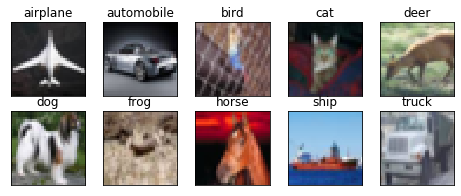

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history. history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

In [12]:
 # Define the mymodel
mymodel = Sequential()
mymodel.add(SeparableConv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 3)))  # Output Size: 32x32x32, Receptive Field: 3x3
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(64, 3, activation='relu')) # Output Size: 30x30x64, Receptive Field: 5x5
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(128, 3, activation='relu')) # Output Size: 28x28x128, Receptive Field: 7x7
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.05))

mymodel.add(SeparableConv2D(256, 3, activation='relu')) # Output Size: 26x26x256, Receptive Field: 9x9
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.05))

mymodel.add(SeparableConv2D(10, 3, activation='relu')) # Output Size: 24x24x10, Receptive Field: 11x11
mymodel.add(GlobalAveragePooling2D())
mymodel.add(Activation('softmax'))

mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mymodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_15 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_16 (Separab (None, 30, 30, 64)        2400      
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_17 (Separab (None, 28, 28, 128)      

Epoch 1/50
782/781 [==============================] - 109s 140ms/step - loss: 1.5481 - accuracy: 0.4421 - val_loss: 1.4075 - val_accuracy: 0.4997
Epoch 2/50
782/781 [==============================] - 105s 134ms/step - loss: 1.2174 - accuracy: 0.5713 - val_loss: 1.1495 - val_accuracy: 0.5905
Epoch 3/50
782/781 [==============================] - 105s 134ms/step - loss: 1.0611 - accuracy: 0.6267 - val_loss: 1.0138 - val_accuracy: 0.6438
Epoch 4/50
782/781 [==============================] - 105s 134ms/step - loss: 0.9588 - accuracy: 0.6627 - val_loss: 0.9617 - val_accuracy: 0.6628
Epoch 5/50
782/781 [==============================] - 104s 133ms/step - loss: 0.8937 - accuracy: 0.6880 - val_loss: 0.9178 - val_accuracy: 0.6764
Epoch 6/50
782/781 [==============================] - 105s 134ms/step - loss: 0.8450 - accuracy: 0.7069 - val_loss: 0.8366 - val_accuracy: 0.7081
Epoch 7/50
782/781 [==============================] - 106s 135ms/step - loss: 0.8019 - accuracy: 0.7197 - val_loss: 0.8327 -

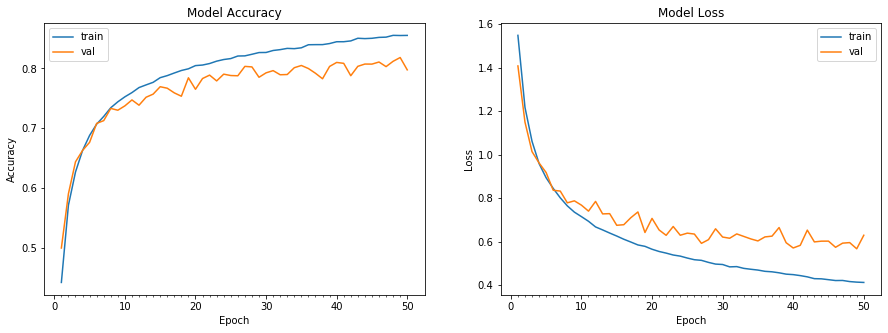

Accuracy on test data is: 79.76


In [13]:
datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=True)

# train the mymodel
start = time.time()
# Train the mymodel
mymodel_info = mymodel.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64), steps_per_epoch=train_features.shape[0]/64,
                                 epochs = 50, validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("mymodel took %0.2f seconds to train"%(end - start))

# plot mymodel history
plot_model_history(mymodel_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, mymodel))